<a href="https://colab.research.google.com/github/atharva9980/credit_card_fraud_detection1/blob/main/cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod  600 ~/.kaggle/kaggle.json

In [4]:
#downloading the dataset
!kaggle competitions download -c dogs-vs-cats

 99% 808M/812M [00:08<00:00, 191MB/s]
100% 812M/812M [00:08<00:00, 96.5MB/s]


In [5]:
ls

dogs-vs-cats.zip  kaggle.json  sample_data/


In [7]:
#now extracting the file
from zipfile import ZipFile
dataset='/content/dogs-vs-cats.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('the dataste is extracted')


the dataste is extracted


In [8]:
#now extracting the file
from zipfile import ZipFile
dataset='/content/train.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('the dataste is extracted')


the dataste is extracted


In [9]:
#counting the number of files
import os
path,dirs,file=next(os.walk('/content/train'))
file_count=len(file)
print(file_count)

25000


In [10]:
#printing the names of files
fie_name=os.listdir('/content/train')
print(fie_name)

['cat.3046.jpg', 'cat.12152.jpg', 'dog.11827.jpg', 'dog.4036.jpg', 'dog.11294.jpg', 'cat.1919.jpg', 'cat.8323.jpg', 'dog.794.jpg', 'dog.2266.jpg', 'cat.8918.jpg', 'cat.9686.jpg', 'dog.5212.jpg', 'dog.6850.jpg', 'dog.6255.jpg', 'dog.3392.jpg', 'dog.7702.jpg', 'dog.8629.jpg', 'cat.760.jpg', 'cat.11562.jpg', 'dog.3030.jpg', 'cat.10217.jpg', 'dog.7447.jpg', 'cat.2589.jpg', 'dog.6724.jpg', 'dog.11836.jpg', 'dog.10892.jpg', 'dog.7997.jpg', 'cat.5905.jpg', 'dog.2747.jpg', 'cat.5278.jpg', 'cat.1276.jpg', 'cat.3773.jpg', 'cat.8195.jpg', 'dog.10848.jpg', 'cat.2749.jpg', 'cat.2984.jpg', 'dog.3629.jpg', 'dog.1882.jpg', 'dog.3550.jpg', 'cat.9015.jpg', 'dog.3770.jpg', 'cat.568.jpg', 'cat.4346.jpg', 'dog.10409.jpg', 'dog.6682.jpg', 'dog.8919.jpg', 'cat.5852.jpg', 'dog.11556.jpg', 'dog.5301.jpg', 'dog.7557.jpg', 'cat.340.jpg', 'dog.2937.jpg', 'cat.3535.jpg', 'cat.1638.jpg', 'cat.6666.jpg', 'cat.9332.jpg', 'dog.10271.jpg', 'cat.10930.jpg', 'cat.7669.jpg', 'dog.6696.jpg', 'dog.4305.jpg', 'cat.3063.jpg',

In [20]:
#importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
from PIL import Image

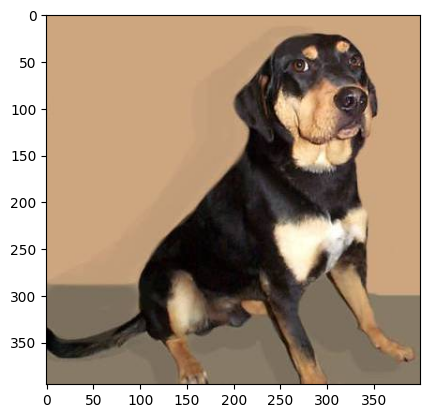

In [14]:
img=mpimg.imread('/content/train/dog.10848.jpg')
plt.imshow(img)

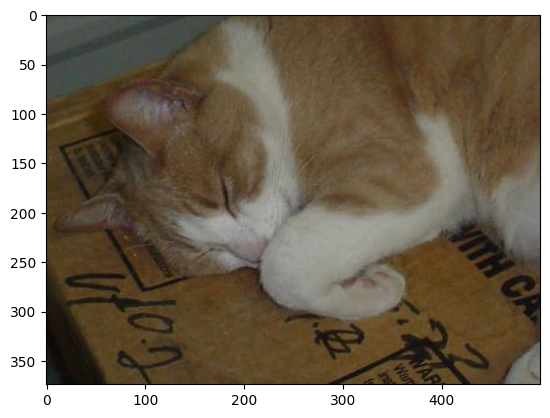

In [15]:
img=mpimg.imread('/content/train/cat.2749.jpg')
plt.imshow(img)

In [19]:
#here the image of dog as well as cat is not of same size and hence we need to resize the data
#lets count the number of dogs and cats images first then proceed further
ct1=0
ct2=0
file_name=os.listdir('/content/train')
for file in file_name:
  name=file[:3]
  if name=='dog':
    ct1+=1
  else :
    ct2+=1

print('dog counts ',ct1,'cat counts',ct2)




dog counts  12500 cat counts 12500


In [22]:
#creating new directory for storing the resized images
original_path='/content/train/'
new_path='/content/resized_img/'
file_name=os.listdir('/content/train')
for i in range(2000):
  data=file_name[i]
  img_path=original_path+data
  img=Image.open(img_path)
  img=img.resize((224,224))
  img=img.convert('RGB')
  new=new_path + data
  img.save(new)



In [23]:
#creating labels for dogs and cats
file_names=os.listdir('/content/resized_img')
labels=[]
for i in range(2000):
  name=file_names[i]
  label=name[:3]
  if(label=='dog'):
    labels.append(1)
  else :
    labels.append(0)
labels[:5]




[0, 0, 1, 1, 1]

In [24]:
#one important step convering the resized image as numpy array
import cv2
import glob

In [25]:
image_path='/content/resized_img/'
img_ext=['png','jpg']
files=[]
[files.extend(glob.glob(image_path + '*.' + e)) for e in img_ext]
dog_cat=np.asarray([cv2.imread(file) for file in files])


In [26]:
dog_cat.shape

(2000, 224, 224, 3)

In [28]:
x=dog_cat
y=np.asarray(labels)

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [33]:
#scaling the data
x_train=x_train/255
x_test=x_test/255


In [39]:
#building the neural network
import tensorflow
import tensorflow_hub as hub
from tensorflow import keras

In [36]:
mobilenet_v2 ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

In [38]:
pre_trained_model=hub.KerasLayer(mobilenet_v2,trainable=False,input_shape=(224,224,3))

In [40]:
model=keras.Sequential([
    pre_trained_model,
    keras.layers.Dense(2)
])

In [41]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']

)

In [43]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 69s 1s/step - loss: 1.2947 - accuracy: 0.8450
Epoch 2/5
50/50 [==============================] - 62s 1s/step - loss: 0.4064 - accuracy: 0.9450
Epoch 3/5
50/50 [==============================] - 69s 1s/step - loss: 0.4265 - accuracy: 0.9494
Epoch 4/5
50/50 [==============================] - 60s 1s/step - loss: 0.4539 - accuracy: 0.9550
Epoch 5/5
50/50 [==============================] - 59s 1s/step - loss: 0.4604 - accuracy: 0.9575


In [44]:
y_predict_test=model.predict(x_test)

13/13 [==============================] - 13s 906ms/step


In [47]:
y_predict_test=[np.argmax(i) for i in y_predict_test]

In [48]:
y_predict_test[:5]

[1, 1, 1, 1, 0]

In [54]:
model.evaluate(x_test,y_test)

13/13 [==============================] - 17s 1s/step - loss: 0.4881 - accuracy: 0.9350


[0.4880705773830414, 0.9350000023841858]